In [1]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.io.fits as fits
import os
import glob
from astropy.table import Table
from astropy.io import ascii
import astropy.units as u
import astropy.constants as const
from astropy.modeling import models, fitting
import lightkurve as lk
from scipy.interpolate import interp1d


#matplotlib set up
%matplotlib inline
from matplotlib import rcParams
rcParams["figure.figsize"] = (14, 5)
rcParams["font.size"] = 20

3270k m dwarf with 0.64 m sun wd. L980-5 is best proxy. Has swift uvm2

In [7]:
gaia = Table.read('data/lhs1817_gaia_spectrum.vot')
mask = gaia['type'] == 'XP'
# plt.plot(gaia['wavelength'][mask]*10, gaia['flux'][mask]*(u.W/u.m**2/u.nm).to(u.erg/u.s/u.cm**2/u.AA), 
#            label = 'Gaia XP spectrum', c='C0', lw=2)
gw, gf = gaia['wavelength'][mask]*10, gaia['flux'][mask]*(u.W/u.m**2/u.nm).to(u.erg/u.s/u.cm**2/u.AA)

In [9]:
prox = fits.getdata('/media/david/2tb_ext_hd/hddata/mega_muscles/v24_hlsp/L-980-5/hlsp_muscles_multi_multi_l-980-5_broadband_v24_adapt-const-res-sed.fits', 1)
dmw, dmf = prox['WAVELENGTH'], prox['FLUX']

In [16]:
#swift
spath = '/media/david/2tb_ext_hd/hddata/carmenes_binary/lhs1817/swift/00036027001/uvot/products/lhs_1817_uvm2_phot.fits'
cenwaves = dict(V=5468, B=4392, U=3465,UVW1=2600, UVM2=2246, UVW2=1928)
fwhms = dict(V=769, B=975, U=785, UVW1=693, UVM2=498, UVW2=657)
data = fits.getdata(spath, 1)
sw, fwhm = cenwaves[data['FILTER'][0]], fwhms[data['FILTER'][0]]
sf, se = data['AB_FLUX_AA'], data['AB_FLUX_AA_ERR']

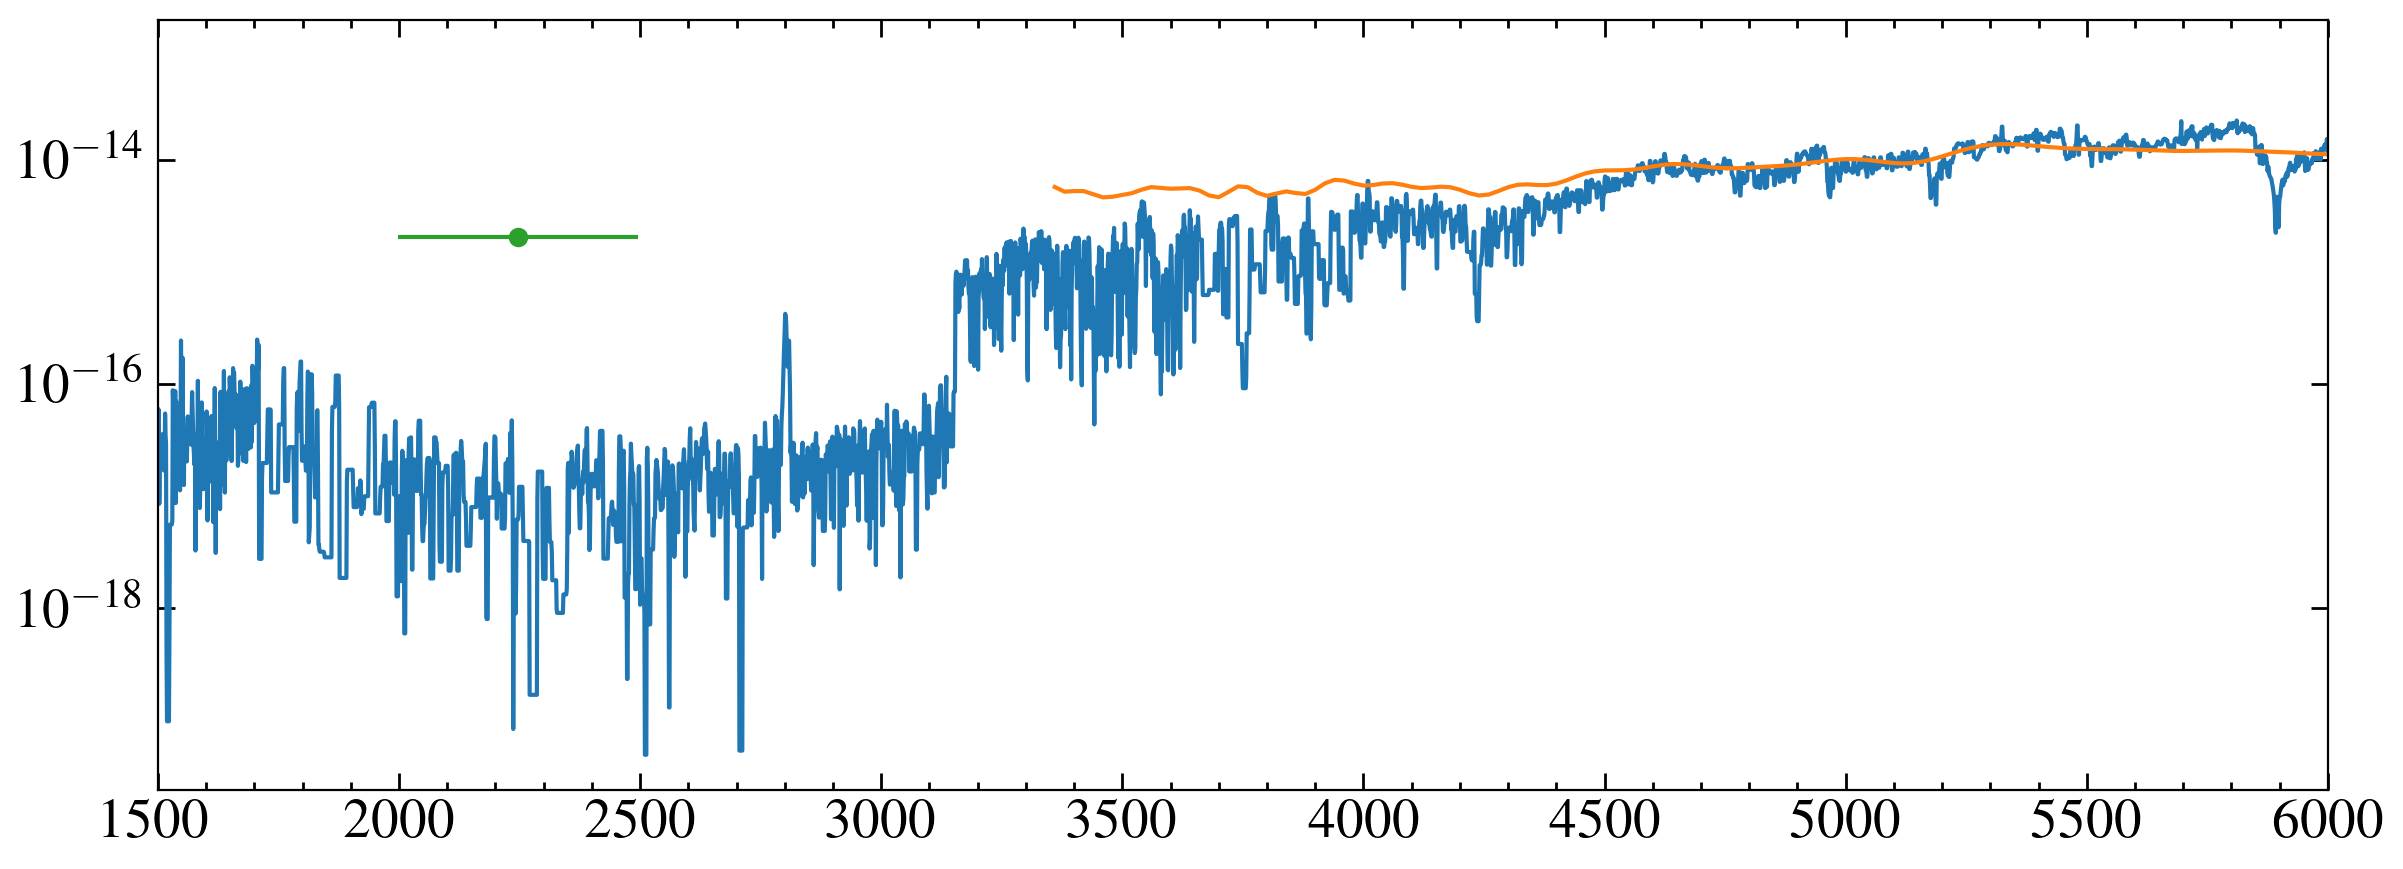

In [19]:
dstar = 1000/61.43
d_l980 = 1000/74.5644


scale = (d_l980/dstar)**2
# print(scale)

plt.plot(dmw, dmf*scale)
plt.plot(gw, gf)

plt.errorbar(sw, sf, yerr=se, xerr=fwhm/2, marker='o', ls='none')

plt.xlim(1500, 6000)
plt.yscale('log')

# swif


In [20]:
import gPhoton

In [23]:
skypos = [91.375, 60.819]


In [21]:
nuv_exps = gPhoton.gFind(band='NUV', skypos=skypos)

NUV: 895.0s (raw) in 3 exposures.
    [ 757702558.995, 757702702.995 ], 144.000 seconds
    [ 850708994.995, 850709383.995 ], 389.000 seconds
    [ 855288316.995, 855288678.995 ], 362.000 seconds


In [22]:
fuv_exps = gPhoton.gFind(band='FUV', skypos=skypos)

FUV: 751.0s (raw) in 2 exposures.
    [ 850708994.995, 850709383.995 ], 389.000 seconds
    [ 855288316.995, 855288678.995 ], 362.000 seconds


In [26]:
target = 'lhs1817'
step_size = 20.
phot_rad = 0.0045
ap_in = 0.0050
ap_out = 0.0060

In [40]:
# nuv_photon_events = gPhoton.gAperture(band='NUV', skypos=skypos, radius=phot_rad, 
#                                       annulus=[ap_in, ap_out], verbose=3, csvfile='galex/{}_nuv_all_lc.csv'.format(target), overwrite=True)
                               

In [41]:
# print(nuv_photon_events['flux_bgsub'], nuv_photon_events['flux_bgsub_err'])

# weights = 1/(nuv_photon_events['flux_bgsub_err']**2)
# nflux = np.average(nuv_photon_events['flux_bgsub'], weights= weights)
# nerr =  (1 / np.sum(weights))**0.5

# print(nflux, nerr)

In [42]:
 # fuv_photon_events = gPhoton.gAperture(band='FUV', skypos=skypos, radius=phot_rad, 
 #                                      annulus=[ap_in, ap_out], verbose=3, csvfile='galex/{}_fuv_all_lc.csv'.format(target, step_size),
 #                                      overwrite=True)#

In [43]:
# print(fuv_photon_events['flux_bgsub'], fuv_photon_events['flux_bgsub_err'])

# weights = 1/(fuv_photon_events['flux_bgsub_err']**2)
# fflux = np.average(fuv_photon_events['flux_bgsub'], weights= weights)
# ferr =  (1 / np.sum(weights))**0.5

# print(fflux, ferr)

In [44]:
# print(sw, sf, se)

In [35]:
phot_w = [1530, 2246, 2310]
phot_f = [4.187085227729264e-16, 2.0435403e-15, 2.096930971169549e-15]
phot_e = [5.2457646901586435e-17, 5.163791e-17, 3.4075713842507104e-17]


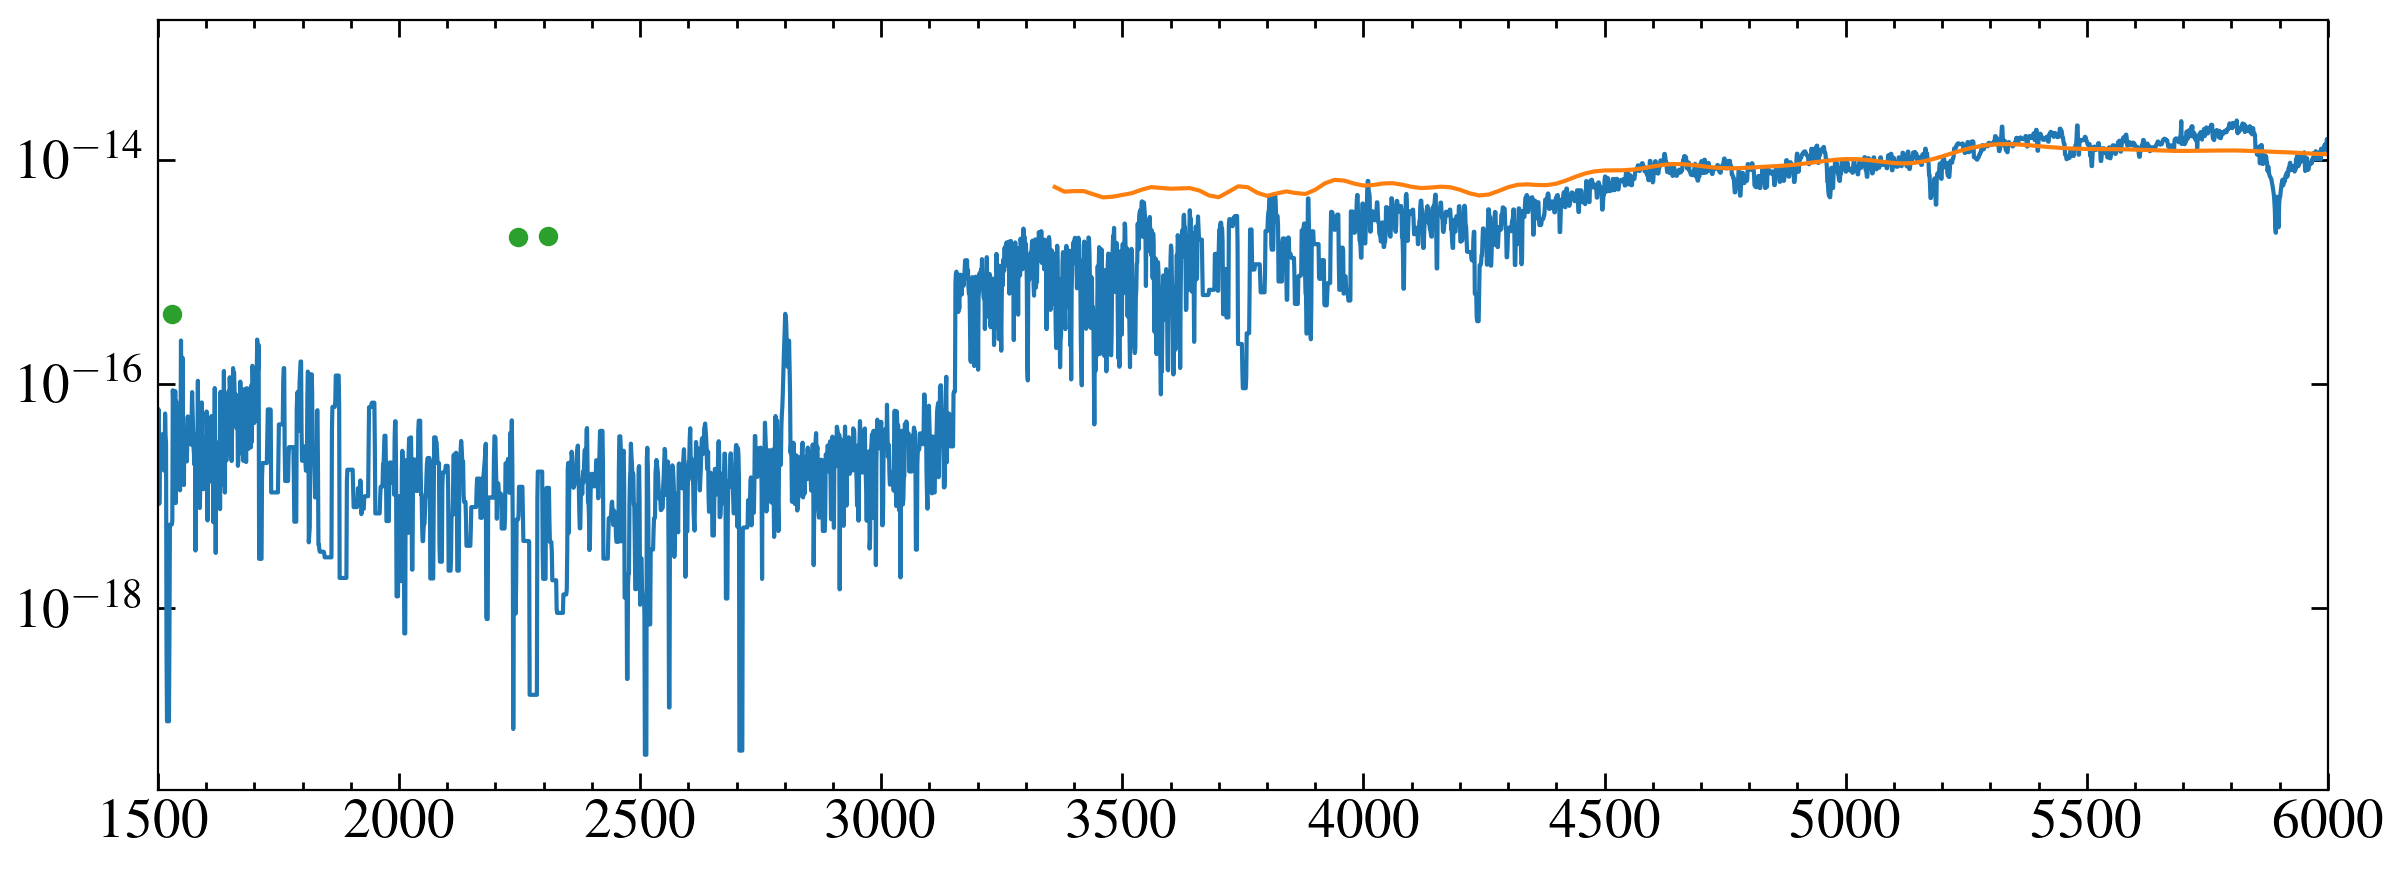

In [45]:
modpath = '/media/david/2tb_ext_hd/hddata/carmenes_binary/'
mods = glob.glob('{}models_1628872352/koester2/*.dat.txt'.format(modpath))
mods

['/media/david/2tb_ext_hd/hddata/carmenes_binary/models_1628872352/koester2/da05000_800.dk.dat.txt',
 '/media/david/2tb_ext_hd/hddata/carmenes_binary/models_1628872352/koester2/da05250_800.dk.dat.txt',
 '/media/david/2tb_ext_hd/hddata/carmenes_binary/models_1628872352/koester2/da05500_800.dk.dat.txt',
 '/media/david/2tb_ext_hd/hddata/carmenes_binary/models_1628872352/koester2/da05750_800.dk.dat.txt',
 '/media/david/2tb_ext_hd/hddata/carmenes_binary/models_1628872352/koester2/da06000_800.dk.dat.txt',
 '/media/david/2tb_ext_hd/hddata/carmenes_binary/models_1628872352/koester2/da06250_800.dk.dat.txt',
 '/media/david/2tb_ext_hd/hddata/carmenes_binary/models_1628872352/koester2/da06500_800.dk.dat.txt',
 '/media/david/2tb_ext_hd/hddata/carmenes_binary/models_1628872352/koester2/da06750_800.dk.dat.txt',
 '/media/david/2tb_ext_hd/hddata/carmenes_binary/models_1628872352/koester2/da07000_800.dk.dat.txt',
 '/media/david/2tb_ext_hd/hddata/carmenes_binary/models_1628872352/koester2/da07250_800.dk.

In [47]:
rwd = 0.0127*u.Rsun
wd_scale = (rwd.to(u.m)/(dstar*u.pc).to(u.m))**2

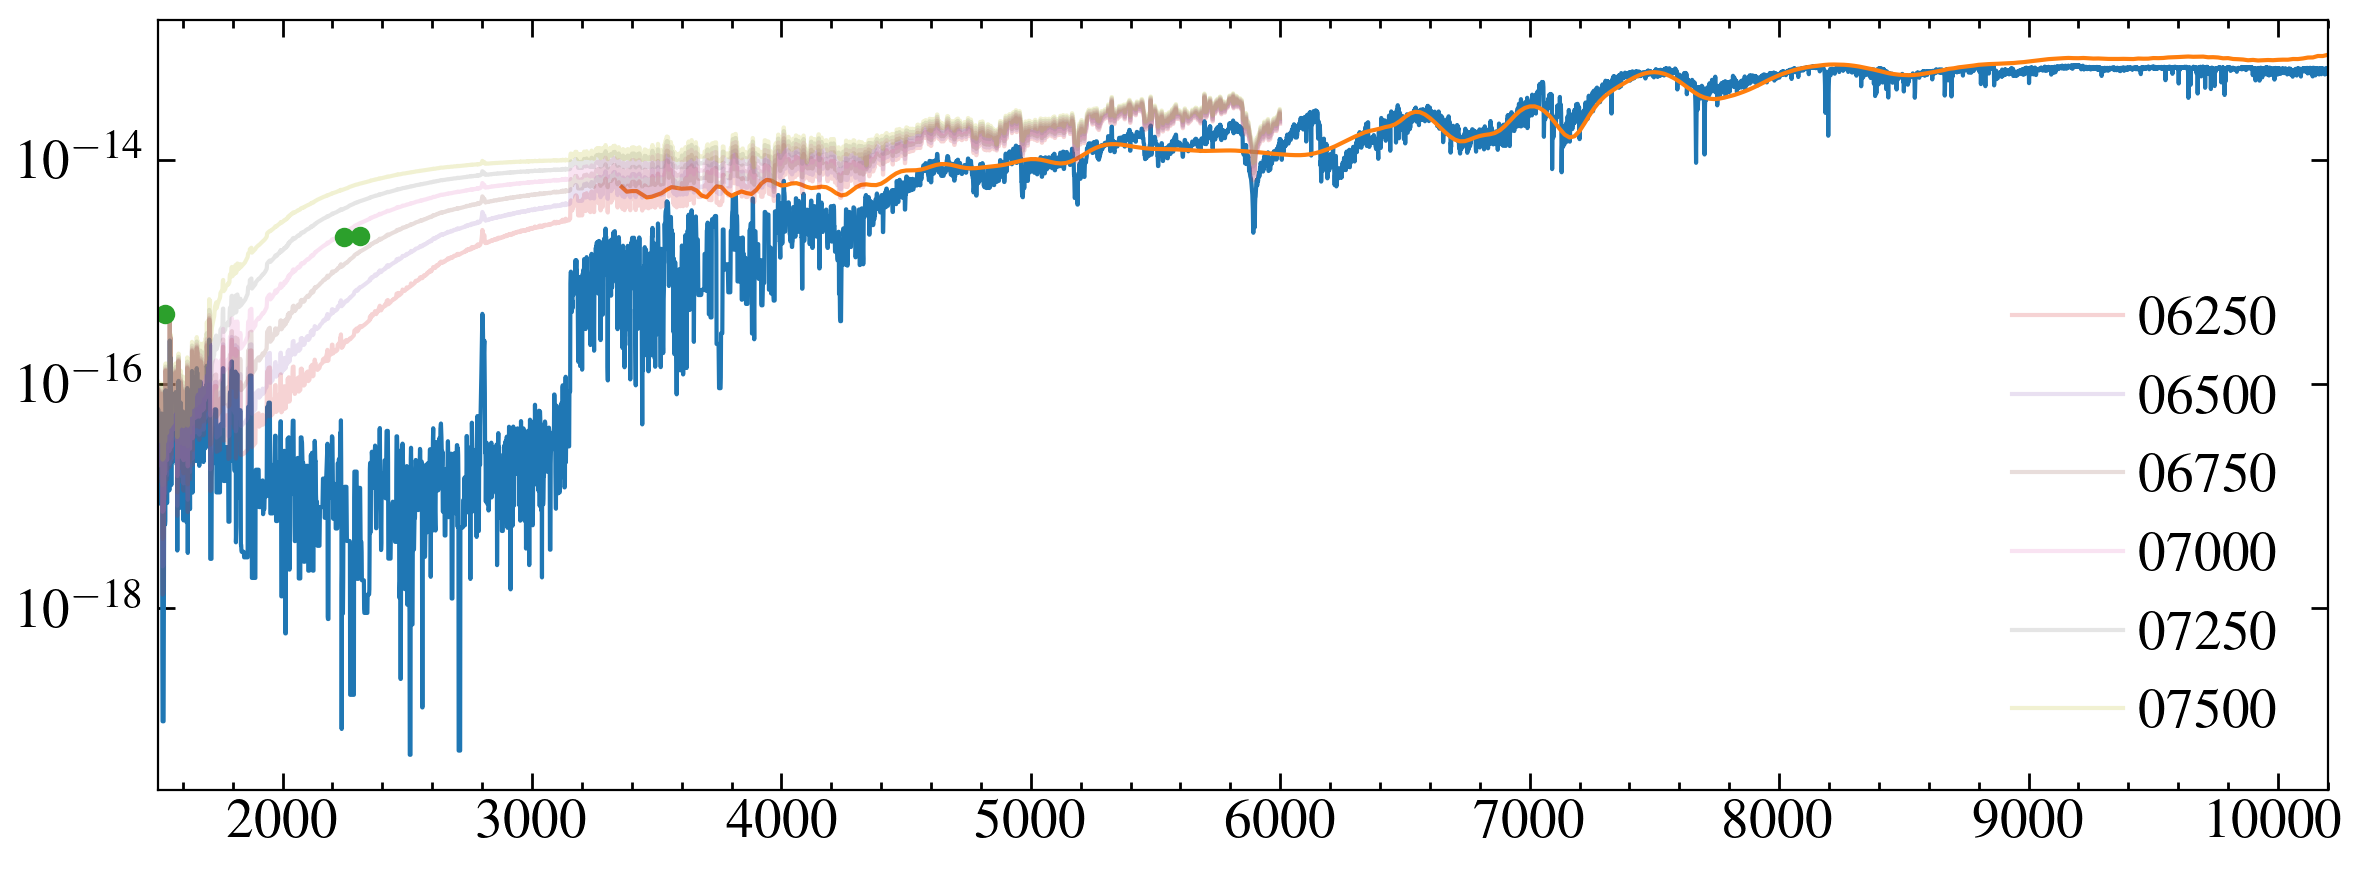

In [65]:
fig, ax= plt.subplots()

ax.plot(dmw, dmf*scale)
ax.plot(gw, gf)

gmask = (dmw > 1000) & (dmw < 6000)
pw, pf = dmw[gmask], dmf[gmask]

ax.errorbar(phot_w, phot_f, yerr=phot_e, marker='o', ls = 'none')

ax.set_xlim(1500, gw[-1])
ax.set_yscale('log')

for model in mods[5:11]:
    tmod = os.path.split(model)[1][2:7]
    # print(tmod)
    mw, mf = np.loadtxt(model, unpack=True)
    wdmask =  (mw > 1300) & (mw < 6000)
    mw, mf = mw[wdmask], mf[wdmask]*wd_scale
    mfi = interp1d(mw, mf, fill_value='extrapolate')(pw)
    mfi = mfi+pf
    ax.plot(pw, mfi, alpha=0.2, label = tmod)
    if tmod == '07000':
        modw, modf = pw, mfi
    
ax.legend()

In [66]:
mod = Table([modw, modf], names=['#WAVELENGTH', 'FLUX'])
mod.write('lhs1817_model.dat', format='ascii.basic', overwrite=True)